# Принципы работы Decision Trees

In [5]:
import pandas as pd
imp****ort numpy as np

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

In [6]:
import seaborn as sns
sns.set_theme(context='talk', style='whitegrid')

Создадим игрушечные данные

In [7]:
x = np.arange(0, 10, 0.1).reshape(-1, 1)
y = np.sin(x)

In [8]:
train_x, test_x = train_test_split(x, test_size=0.3, random_state=42)
train_y, test_y = train_test_split(y, test_size=0.3, random_state=42)

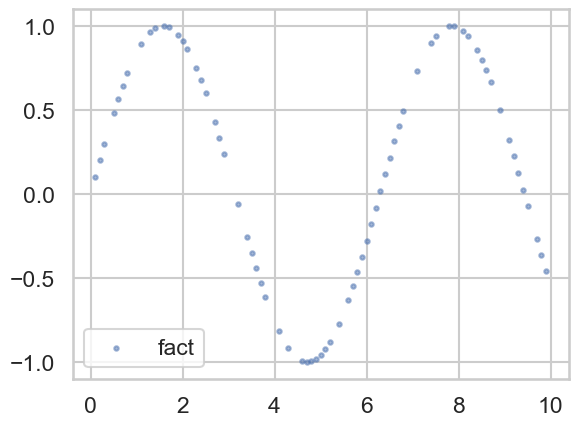

In [9]:
plt.scatter(train_x, train_y, color='b', s=10, alpha=0.5, label='fact')
plt.legend()
plt.show()

Попробуем обучить модель линейной легрессии

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [12]:
train_predicts = lr.predict(train_x)
test_predicts = lr.predict(test_x)

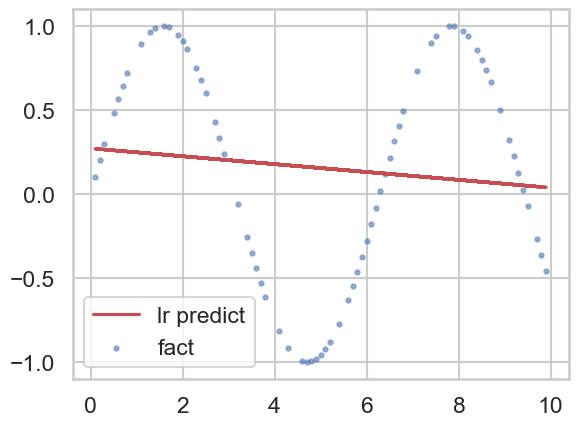

In [13]:
plt.plot(train_x, train_predicts, color='r', label='lr predict')

plt.scatter(train_x, train_y, color='b', s=10, alpha=0.5, label='fact')
plt.legend()

plt.show()

Ожидаемо получили недообученную модель

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
def run_dt(params):
    dt = DecisionTreeRegressor(**params)
    dt.fit(train_x, train_y)

    train_predicts = dt.predict(train_x)
    test_predicts = dt.predict(test_x)

    sorted_train_x, train_predicts = zip(*sorted(zip(train_x, train_predicts)))
    sorted_test_x, test_predicts = zip(*sorted(zip(test_x, test_predicts)))

    # plt.figure(figsize=(16, 9))

    plt.plot(sorted_train_x, train_predicts, color='r', label='dt predict')
    # plt.plot(sorted_test_x, test_predicts, color='r')

    plt.scatter(train_x, train_y, color='b', s=10, alpha=0.5, label='fact')
    # plt.scatter(test_x, test_y, color='r', s=10, alpha=0.5)
    plt.legend()
    plt.show()
    return dt

In [16]:
from sklearn.tree import plot_tree

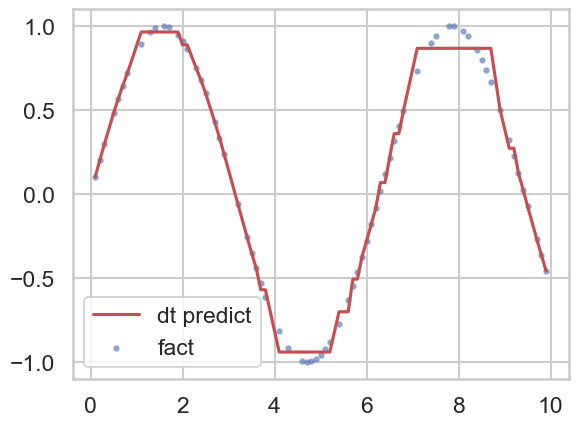

In [17]:
dt = run_dt({'max_depth': 6})

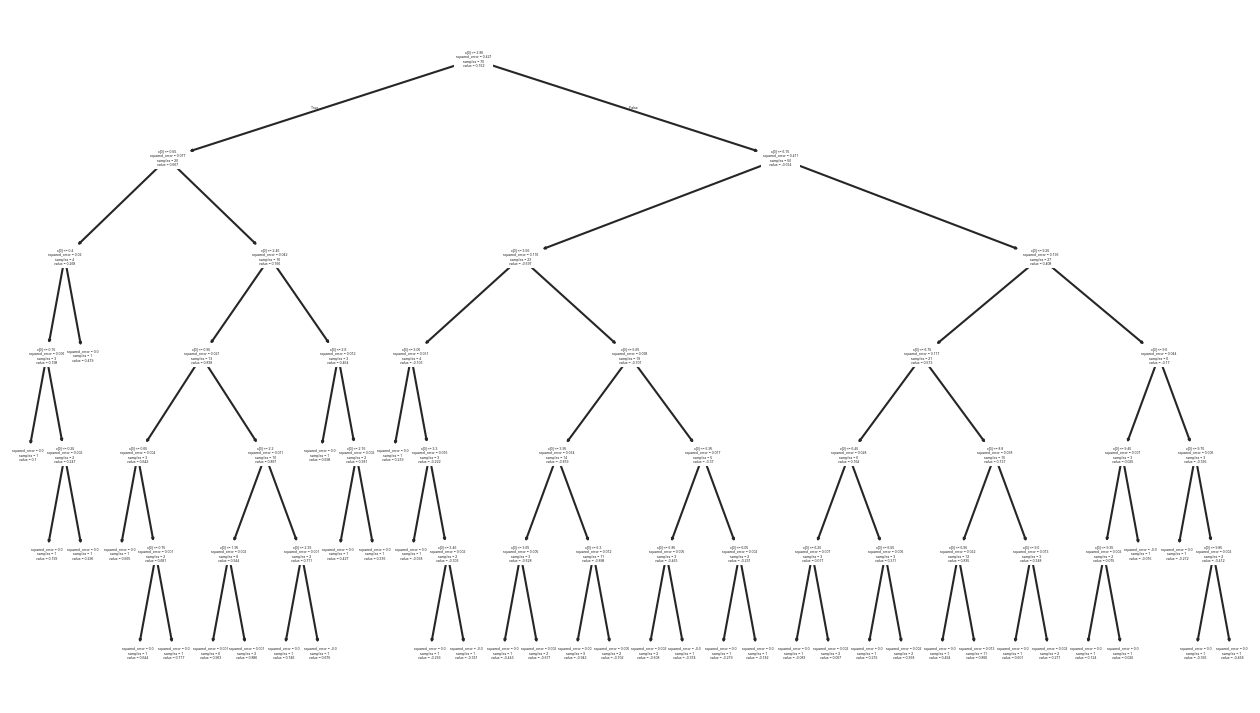

In [18]:
plt.figure(figsize=(16, 9))
plot_tree(dt)
plt.savefig('tree.png', dpi=600)
plt.show()

In [19]:
train_y[train_x <= 0.3].shape, train_y[train_x <= 0.3].mean()

((2,), np.float64(0.14925137372094469))

In [20]:
oot_x = np.arange(10, 15, 0.1).reshape(-1, 1)

In [21]:
oot_predicts = dt.predict(oot_x)

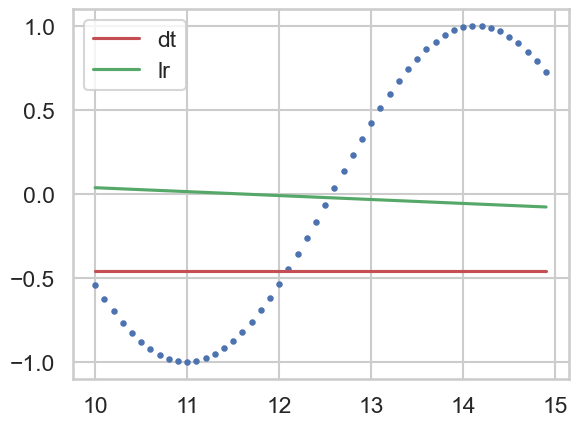

In [22]:
plt.scatter(oot_x, np.sin(oot_x), color='b', s=10)


plt.plot(oot_x, oot_predicts, color='r', label='dt')
plt.plot(oot_x, lr.predict(oot_x), color='g', label='lr')
plt.legend()
plt.show()

## Применим к задаче

In [23]:
# Качаем данные
# !gdown 1nCHCT5XWio5fSN0mYNwRbEzTGL_sIcN4

In [24]:
#Считываем скачанный csv файл
df = pd.read_csv('loan_data.csv')

In [25]:
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [27]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [28]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Заменим категориальные переменные

In [29]:
for col in df.select_dtypes(include='object').columns:
  df[col] = df[col].astype('category').cat.codes

In [30]:
df.dtypes

person_age                        float64
person_gender                        int8
person_education                     int8
person_income                     float64
person_emp_exp                      int64
person_home_ownership                int8
loan_amnt                         float64
loan_intent                          int8
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file       int8
loan_status                         int64
dtype: object

In [31]:
target_col = 'loan_status'

In [32]:
train, test = train_test_split(df, test_size = 0.3, random_state=42)

In [33]:
display(train)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
30159,38.0,1,0,41579.0,14,3,5750.0,3,11.01,0.14,16.0,647,1,0
6777,24.0,0,0,28052.0,3,3,7000.0,0,10.62,0.25,3.0,649,0,1
36563,28.0,0,0,63722.0,4,0,7000.0,1,16.26,0.11,5.0,626,1,0
11784,26.0,1,0,91870.0,3,0,1200.0,4,10.25,0.01,2.0,662,0,0
10370,22.0,1,4,29550.0,0,3,10000.0,0,11.01,0.34,3.0,633,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,26.0,1,3,88451.0,6,0,10625.0,1,6.03,0.12,4.0,559,1,0
44732,25.0,0,3,34772.0,3,0,5876.0,2,11.69,0.17,4.0,647,0,1
38158,33.0,0,0,58317.0,9,0,10707.0,5,10.74,0.18,9.0,652,1,0
860,26.0,1,4,178602.0,6,3,20000.0,0,17.99,0.11,3.0,604,0,1


In [34]:
def entropy(p):
    try:
        return -p * np.log2(p) - (1-p) * np.log2(1-p)
    except:
        return 1

In [35]:
def gini_impurity(p):
    return 1 - (p**2 + (1-p)**2)

In [36]:
def best_continious_split(values, targets, criterion, plot=False):
    sorted_pairs = sorted(list(zip(values, targets)), key = lambda x: x[0])

    n = len(sorted_pairs)
    p = sum(targets) / n
    node_criterion = criterion(p)

    best_criterion = node_criterion
    best_split = None

    split_vals = []
    criterion_vals = []

    ones = 0
    total_ones = sum(targets)

    for i in tqdm(range(1, len(sorted_pairs))):
        split_val = (sorted_pairs[i-1][0] + sorted_pairs[i][0]) / 2
        ones += sorted_pairs[i-1][1]

        p_left = ones / i
        p_right = (total_ones - ones) / (n-i)

        split_criterion = i / n * criterion(p_left) + (n-i) / n * criterion(p_right)

        split_vals.append(split_val)
        criterion_vals.append(split_criterion)

        if split_criterion < best_criterion:
            best_criterion = split_criterion
            best_split = split_val

    if plot:
        plt.plot(split_vals, criterion_vals)

    return (best_split, best_criterion)

In [37]:
def find_best_split(df, feature_col, target_col):
    print('Entropy:')
    display(best_continious_split(df[feature_col], df[target_col], entropy, plot=True))
    plt.show()
    print('Gini Impurity:')
    display(best_continious_split(df[feature_col], df[target_col], gini_impurity, plot=True))
    plt.show()

In [38]:
find_best_split(train, 'person_income', target_col)

Entropy:


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [40]:
find_best_split(train[(train['person_income'] < 72652.0) & (train['person_income'] >= 42609.5)], 'person_income', target_col)

Entropy:


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [39]:
x_cols = train.drop(target_col, axis=1).columns
y_col = target_col

In [42]:
X_train = train[x_cols]
y_train = train[y_col]

X_test = test[x_cols]
y_test = test[y_col]

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
from sklearn.metrics import roc_auc_score, \
                            confusion_matrix,\
                            ConfusionMatrixDisplay, \
                            accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score

In [46]:
train_preds = dt.predict(X_train)
test_preds = dt.predict(X_test)

In [47]:
train_probas = dt.predict_proba(X_train)[:, 1]
test_probas = dt.predict_proba(X_test)[:, 1]

In [48]:
def show_metrics(true, preds, probas=None):

    print(f"Accuracy: {accuracy_score(true, preds):.2}")
    print(f"Precision: {precision_score(true, preds):.2}")
    print(f"Recall: {recall_score(true, preds):.2}")
    print(f"F1 score: {f1_score(true, preds):.2}")
    print(f"ROC AUC score (predict): {roc_auc_score(true, preds):.2}")

    if probas is not None:
        print(f"ROC AUC score (predict_proba): {roc_auc_score(true, probas):.2}")

    ConfusionMatrixDisplay.from_predictions(true, preds)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC score (predict): 1.0
ROC AUC score (predict_proba): 1.0


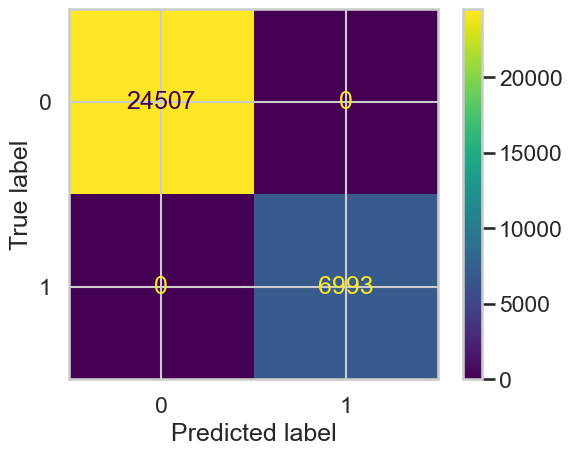

In [49]:
show_metrics(y_train, train_preds, train_probas)

Accuracy: 0.89
Precision: 0.76
Recall: 0.78
F1 score: 0.77
ROC AUC score (predict): 0.85
ROC AUC score (predict_proba): 0.85


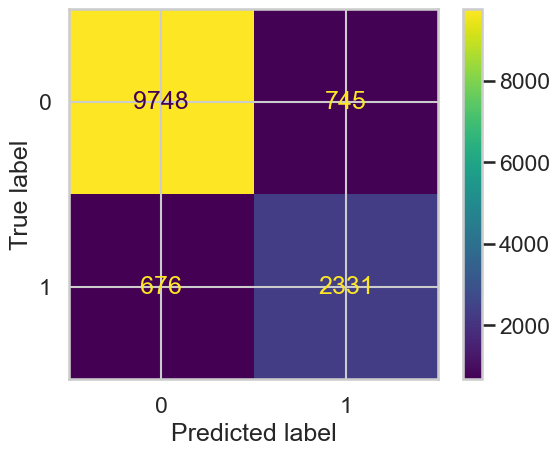

In [50]:
show_metrics(y_test, test_preds, test_probas)

In [51]:
print('Количество листьев:', dt.get_n_leaves())
print('Глубина:', dt.get_depth())

Количество листьев: 2013
Глубина: 31


In [52]:
print('Уникальные ответы:')
print(set(dt.predict_proba(X_test)[:, 1]))

Уникальные ответы:
{np.float64(0.0), np.float64(1.0)}


In [53]:
from tqdm.notebook import tqdm

Переберём параметр - количество листьев и посмотрим на изменение метрик качества

In [64]:
n_leaves = []
train_roc_auc_scores = []
test_roc_auc_scores = []
# ********
for n in tqdm(range(2, 200, 2)):
    dt = DecisionTreeClassifier(max_leaf_nodes=n)
    dt.fit(X_train, y_train)

    n_leaves.append(n)
    train_roc_auc_scores.append(roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1]))
    test_roc_auc_scores.append(roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

plt.plot(n_leaves, train_roc_auc_scores, label='Train')
plt.plot(n_leaves, test_roc_auc_scores, label='Test')
plt.xlabel('Максимальное количество листов в дереве')
plt.ylabel('ROC AUC ')
plt.title('Зависимость ROC AUC от сложности дерева на Train и Test выборках')
plt.legend();

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [65]:
# Выберим то количество листов, которое соответствует максмимальной метрике на test
max_index = test_roc_auc_scores.index(max(test_roc_auc_scores))
best_n_leaves = n_leaves[max_index]

ValueError: max() iterable argument is empty

In [66]:
best_n_leaves

NameError: name 'best_n_leaves' is not defined

In [67]:
dt = DecisionTreeClassifier(max_leaf_nodes=best_n_leaves)
dt.fit(X_train, y_train)

Exception ignored in: <function tqdm.__del__ at 0x0000024431636520>
Traceback (most recent call last):
  File "C:\Users\evoni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "C:\Users\evoni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000024431636520>
Traceback (most recent call last):
  File "C:\Users\evoni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "C:\Users\evoni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra

NameError: name 'best_n_leaves' is not defined

In [68]:
train_preds = dt.predict(X_train)
test_preds = dt.predict(X_test)

In [69]:
train_probas = dt.predict_proba(X_train)[:, 1]
test_probas = dt.predict_proba(X_test)[:, 1]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC score (predict): 1.0
ROC AUC score (predict_proba): 1.0


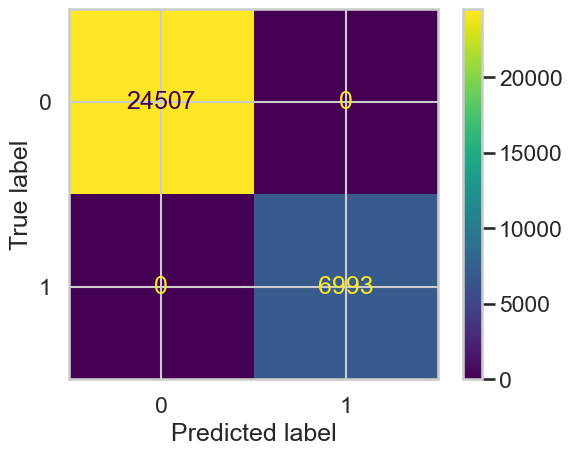

In [70]:
show_metrics(y_train, train_preds, train_probas)

Accuracy: 0.89
Precision: 0.76
Recall: 0.78
F1 score: 0.77
ROC AUC score (predict): 0.85
ROC AUC score (predict_proba): 0.85


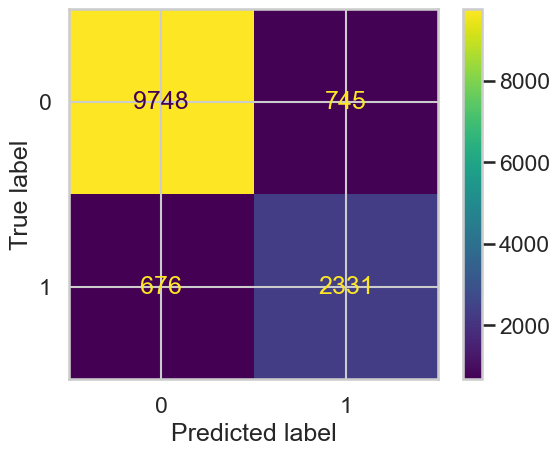

In [71]:
show_metrics(y_test, test_preds, test_probas)

# Прунинг

In [72]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

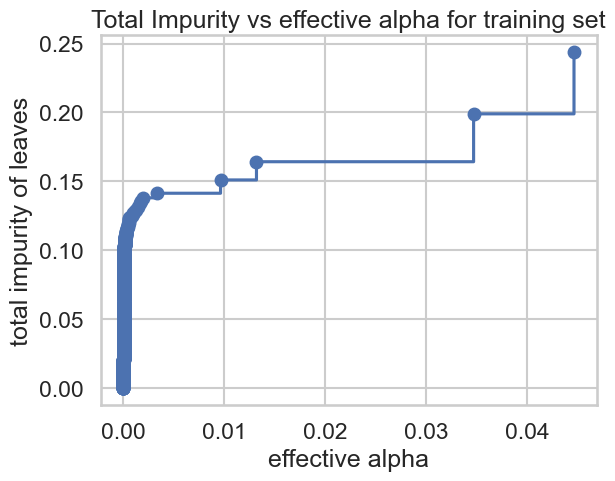

In [73]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [74]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.10178639117248495


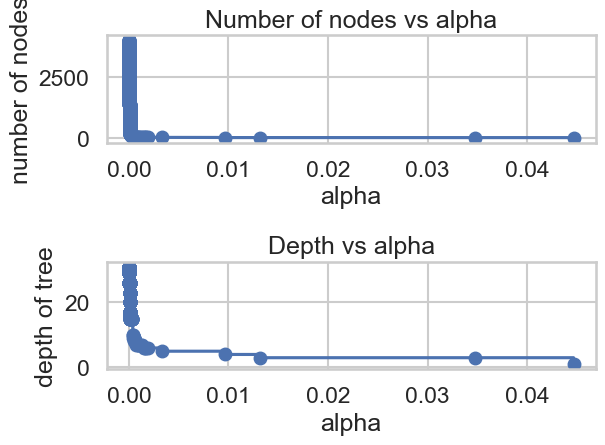

In [75]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

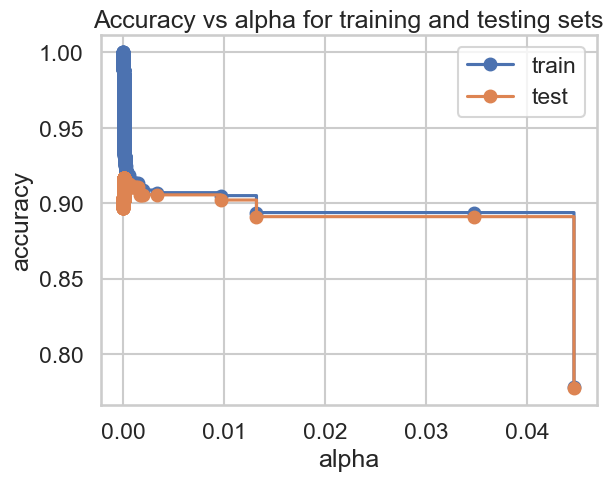

In [76]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Домашка

1) По аналогии с функцией best_continious_split, напишите функцию best_categorical_split (которая перебирает все возможные комбинации категорий для сплита), если количество категорий больше 5, то использует стратегию one vs rest

P.S Возможно best_continious_split придётся переписать, убрав предположение о том, что все значения в фиче разные

2) Реализовать собственный класс дерева решения для бинарной классификации

3) Протестировать его на датасете одобрения кредита (approval rate)

4) Сравнить качество работы модели при разных критериях разбиения (gini vs entropy)

5) Сравнить качество с sklearn деревом

In [77]:
# Используя функции нахождения сплита, реализуйте свой класс MyDecisionTreeClassifier
# Для бинарной классификации, который может использовать в качестве критерия
# gini impurity и entropy на выбор

class MyDecisionTreeClassifier:
    def __init__(self, criterion='gini', max_leaves=None, min_samples_leaf=1):
        '''
        Конструктор класса
        criterion -- критерий может быть либо 'gini', либо 'entropy'
        max_leaves -- максимальное количество листо в дереве, если None -- то дерево не ограничено
        min_samples_leaf -- минимальное количество объектов в листе
        '''
        self.criterion = criterion
        self.max_leaves = max_leaves
        self.min_samples_leaf = min_samples_leaf
        self.root = {
            'feature_name': None,
            'threshold ': None,
            'left_child': None,
            'right_child': None,
            'answer': None
        } # корневой узел

    def fit(X_train, y_train):
        '''
        Функция обучения -- рекурсивно проводит разбиения и выбирает наилучшее
        '''
        pass

    def predict(X):
        '''
        Функция предсказания класса, для каждого наблюдения проходит по дереву, пока не попадёт в лист
        В зависимости от листа, в который попало наблюдение делается предсказание (наиболее часто встречающийся класс)
        '''
        pass

    def predict_proba(X):
        '''
        Функция предсказания вероятности класса, для каждого наблюдения проходит по дереву, пока не попадёт в лист
        В зависимости от листа, в который попало наблюдение делается предсказание для каждого класса:
        Его доля в листе
        '''
        pass

# P.S. При ограничении на количество листьев, возможно нужно подумать над стратегией отбора листьев. Наивный вариант рекурсивно идти в порядке обхода дерева возможно не самый оптимальный